In [97]:
pkg load io
pkg load signal
pkg load control
e4init 

disp('New privately owned housing units started')
house=csvread(
"./MY_DATA/house.csv");
house=house(98:781,2);
size(house)


                      EEEEEEEEE   444  444
                     EEEEEEEEEEE  444  444
                     EEE          44444444
                     EEE           4444444
                     EEEEEEE           444
                     EEEEEEE           444
                     EEE
                     EEE
                     EEEEEEEEEE
                      EEEEEEEE

Toolbox for State Space Estimation of Econometric Models
                   Version  JAN-2012

Web: www.ucm.es/info/icae/e4
 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor? .  : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. number of iterations . . . :       75
Verbose iterations. . . . . . . : YES
*************

In [98]:
addpath('C:\Program Files\PracticasLDHR-main\OctMat')
savepath
addpath('C:\Program Files\PracticasLDHR-main\spcline')
addpath('C:/Program Files/E4withSubspaces')
savepath
addpath('C:\Program Files\E4Matlab')
savepath
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath

In [99]:
PaPhouse = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPhouse = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
warning('off','all');
[VARhouse, Phouse, TVPhouse, oarhouse] = autodhr(house, 12, [], [], PaPhouse, TVPaPhouse, 1);
NVRhouse = VARhouse(2:8)./VARhouse(1); % calculation of the variances of the DHR components
filt = 0;
[trendhouse, seasonhouse, cyclehouse, irreghouse] = dhrfilt(house, Phouse, TVPhouse, VARhouse, 12, filt, 0);

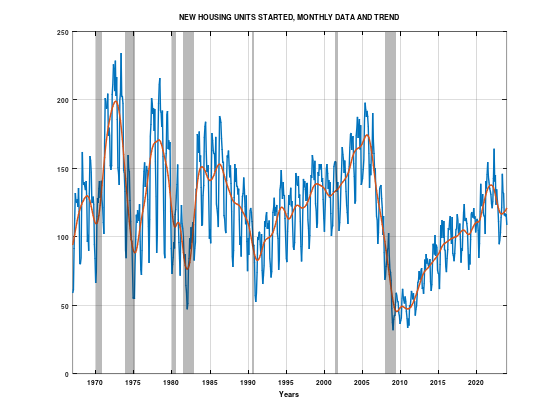

In [100]:
trendhouse = trendhouse(:, 1); % the first column of trend is the trend vector
figure(1)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendhouse));  % Generate dates
dates = dates';

plot(dates, [house, trendhouse], 'linewidth', 1.4)
grid on
title('NEW HOUSING UNITS STARTED, MONTHLY DATA AND TREND')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [101]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendhouse=diff(trendhouse); % first difference of trend vector
time(5,:)
house(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 132


In [102]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrechouse = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) < 0) && dtrendhouse(i-1) > 0 
        confirmedrechouse = [confirmedrechouse, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrechouse = confirmedrechouse'; % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(time); % checking time vector size
recessiontimehouse = time(confirmedrechouse,:); % DATES OF CONFIRMED RECESSION
recessionhouse = dtrendhouse(confirmedrechouse,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [103]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexphouse = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) > 0) && dtrendhouse(i-1) < 0 
        confirmedexphouse = [confirmedexphouse, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexphouse = confirmedexphouse'; % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(time); % checking time vector size
expansiontimehouse = time(confirmedexphouse,:); % DATES OF CONFIRMED EXPANSION
expansionhouse = dtrendhouse(confirmedexphouse,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendhouse));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrechouse and confirmedexphouse indices to dates
recessionindhouse = dates(confirmedrechouse);
expansionindhouse = dates(confirmedexphouse);
size(dates);
size(dtrendhouse);

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


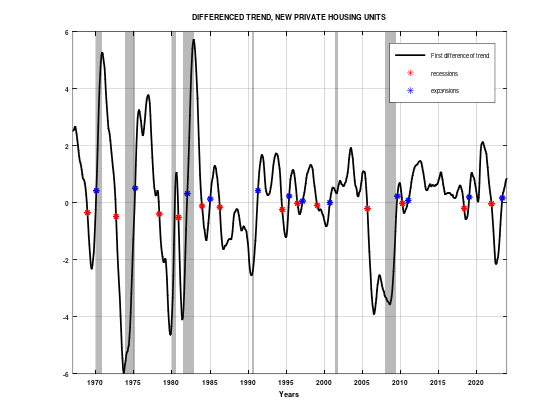

In [104]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(2)
plot(dates,dtrendhouse,'k','linewidth',1.7)
hold on
plot(recessionindhouse, recessionhouse, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindhouse, expansionhouse, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, NEW PRIVATE HOUSING UNITS')
legend('First difference of trend','recessions','expansions')

hold off;

In [105]:
disp('Dates of expansions and recessions - new housing units started')
expansiontimehouse % date when trend derivative >0
recessiontimehouse % date when trend derivative <0

Dates of expansions and recessions - new housing units started
expansiontimehouse =

1970-03-01  
1975-04-01  
1982-02-01  
1985-02-01  
1991-05-01  
1995-06-01  
1997-03-01  
2000-10-01  
2009-08-01  
2011-01-01  
2019-01-01  
2023-05-01  

recessiontimehouse =

1969-01-01  
1972-10-01  
1978-06-01  
1980-12-01  
1984-01-01  
1986-05-01  
1994-07-01  
1996-07-01  
1999-02-01  
2005-09-01  
2010-04-01  
2018-05-01  
2021-12-01  



In [106]:
disp('New privately owned building permits authorized')
permits=csvread(
"./MY_DATA/permits.csv");
permits=permits(98:781,2);
size(permits)

New privately owned building permits authorized
ans =

   684     1



In [107]:
PaPpermits = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPpermits = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
[VARpermits, Ppermits, TVPpermits, oarpermits] = autodhr(permits, 12, [], [], PaPpermits, TVPaPpermits, 1);
NVRpermits = VARpermits(2:8)./VARpermits(1); % calculation of the variances of the DHR components
filt = 0;
[trendpermits, seasonpermits, cyclepermits, irregpermits] = dhrfilt(permits, Ppermits, TVPpermits, VARpermits, 12, filt, 0);

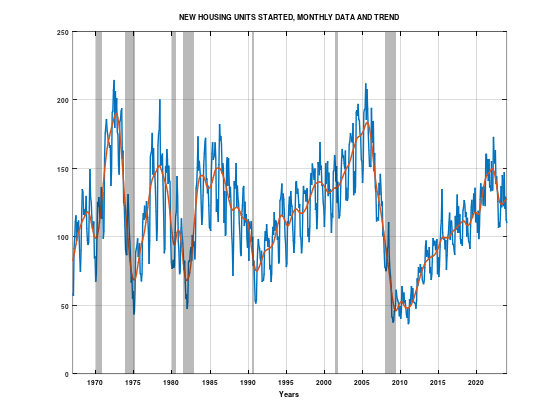

In [108]:
trendpermits = trendpermits(:, 1); % the first column of trend is the trend vector
figure(3)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendpermits));  % Generate dates
dates = dates';

plot(dates, [permits, trendpermits], 'linewidth', 1.4)
grid on
title('NEW HOUSING UNITS STARTED, MONTHLY DATA AND TREND')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

% ylim([min(trendpermits) - 20, max(trendpermits) + 20]);
y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;


In [109]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendpermits=diff(trendpermits); % first difference of trend vector
time(5,:)
permits(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 111.20


In [110]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrecpermits = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendpermits) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendpermits(i:i+window-1) < 0) && dtrendpermits(i-1) > 0 
        confirmedrecpermits = [confirmedrecpermits, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrecpermits = confirmedrecpermits'; % to column vector from row vector 
size(dtrendpermits); % the vector we are using
size(time); % checking time vector size
recessiontimepermits = time(confirmedrecpermits,:); % DATES OF CONFIRMED RECESSION
recessionpermits = dtrendpermits(confirmedrecpermits,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [111]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexppermits = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendpermits) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendpermits(i:i+window-1) > 0) && dtrendpermits(i-1) < 0 
        confirmedexppermits = [confirmedexppermits, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexppermits = confirmedexppermits'; % to column vector from row vector 
size(dtrendpermits); % the vector we are using
size(time); % checking time vector size
expansiontimepermits = time(confirmedexppermits,:); % DATES OF CONFIRMED EXPANSION
expansionpermits = dtrendpermits(confirmedexppermits,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendpermits));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrechouse and confirmedexphouse indices to dates
recessionindpermits = dates(confirmedrecpermits);
expansionindpermits = dates(confirmedexppermits);
size(dates)
size(dtrendpermits)

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:
ans =

   683     1

ans =

   683     1



PLOTTING TREND WITH RECESSION AND EXPANSION DATES


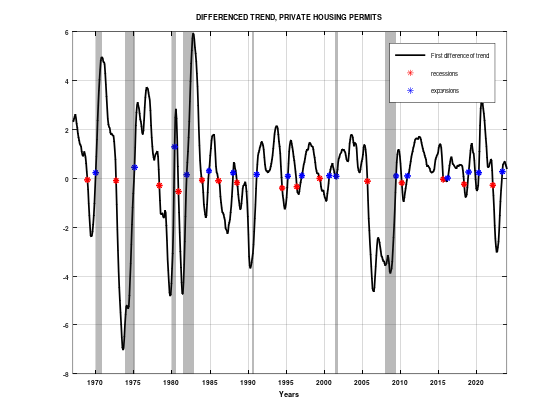

In [112]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(4)
plot(dates,dtrendpermits,'k','linewidth',1.7)
hold on
plot(recessionindpermits, recessionpermits, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindpermits, expansionpermits, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, PRIVATE HOUSING PERMITS')
legend('First difference of trend','recessions','expansions')

hold off;

In [113]:
disp('Dates of expansions and recessions - building private housing permits issued')
expansiontimepermits % date when trend derivative >0
recessiontimepermits % date when trend derivative <0

Dates of expansions and recessions - building private housing permits issued
expansiontimepermits =

1970-02-01  
1975-03-01  
1980-06-01  
1982-01-01  
1984-12-01  
1988-02-01  
1991-03-01  
1995-04-01  
1997-02-01  
2000-09-01  
2001-08-01  
2009-06-01  
2010-12-01  
2016-03-01  
2018-12-01  
2020-04-01  
2023-05-01  

recessiontimepermits =

1969-01-01  
1972-10-01  
1978-06-01  
1980-12-01  
1984-01-01  
1986-03-01  
1988-08-01  
1994-07-01  
1996-06-01  
1999-06-01  
2005-09-01  
2010-03-01  
2015-08-01  
2018-05-01  
2022-02-01  



In [114]:
disp('Motor vehicle retail sales: domestic autos')
autos=csvread(
"./MY_DATA/autos.csv");
autos=autos(2:685,2);
size(autos)

Motor vehicle retail sales: domestic autos
ans =

   684     1



In [115]:
PaPautos = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPautos = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
[VARautos, Pautos, TVPautos, oarautos] = autodhr(autos, 12, [], [], PaPautos, TVPaPautos, 1);
NVRautos = VARautos(2:8)./VARautos(1); % calculation of the variances of the DHR components
filt = 0;
[trendautos, seasonautos, cycleautos, irregautos] = dhrfilt(autos, Pautos, TVPautos, VARautos, 12, filt, 0);

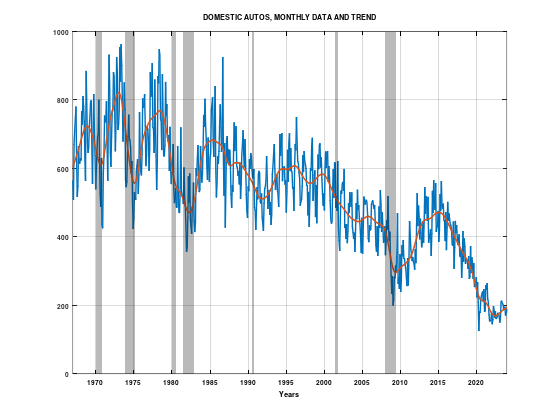

In [116]:
trendautos = trendautos(:, 1); % the first column of trend is the trend vector
figure(5)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendautos));  % Generate dates
dates = dates';

plot(dates, [autos, trendautos], 'linewidth', 1.4)
grid on
title('DOMESTIC AUTOS, MONTHLY DATA AND TREND')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [117]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendautos=diff(trendautos); % first difference of trend vector
time(5,:)
autos(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 744.80


In [118]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrecautos = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendautos) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendautos(i:i+window-1) < 0) && dtrendautos(i-1) > 0 
        confirmedrecautos = [confirmedrecautos, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrecautos = confirmedrecautos'; % to column vector from row vector 
size(dtrendautos); % the vector we are using
size(time); % checking time vector size
recessiontimeautos = time(confirmedrecautos,:); % DATES OF CONFIRMED RECESSION
recessionautos = dtrendautos(confirmedrecautos,:); % the values in trend that are recession points 

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [119]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexpautos = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendautos) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendautos(i:i+window-1) > 0) && dtrendautos(i-1) < 0 
        confirmedexpautos = [confirmedexpautos, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexpautos = confirmedexpautos'; % to column vector from row vector 
size(dtrendautos); % the vector we are using
size(time); % checking time vector size
expansiontimeautos = time(confirmedexpautos,:); % DATES OF CONFIRMED EXPANSION
expansionautos = dtrendautos(confirmedexpautos,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendautos));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrecautos and confirmedexpautos indices to dates
recessionindautos = dates(confirmedrecautos);
expansionindautos = dates(confirmedexpautos);
size(dates)
size(dtrendautos)

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:
ans =

   683     1

ans =

   683     1



PLOTTING TREND WITH RECESSION AND EXPANSION DATES


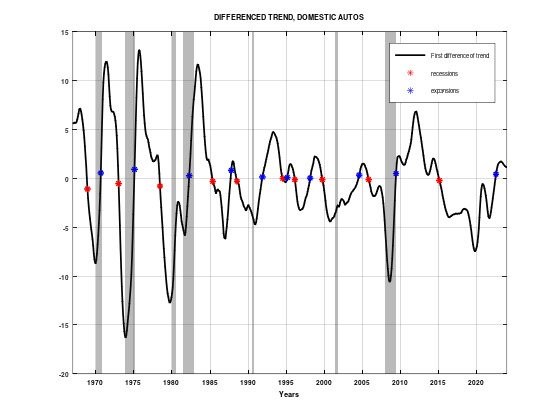

In [120]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(6)
plot(dates,dtrendautos,'k','linewidth',1.7)
hold on
plot(recessionindautos, recessionautos, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindautos, expansionautos, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, DOMESTIC AUTOS')
legend('First difference of trend','recessions','expansions')
hold off;

In [121]:
disp('Dates of expansions and recessions -domestic autos sold')
expansiontimeautos % date when trend derivative >0
recessiontimeautos % date when trend derivative <0

Dates of expansions and recessions -domestic autos sold
expansiontimeautos =

1970-10-01  
1975-03-01  
1982-05-01  
1987-11-01  
1991-12-01  
1995-03-01  
1998-03-01  
2004-08-01  
2009-06-01  
2022-07-01  

recessiontimeautos =

1969-01-01  
1973-02-01  
1978-07-01  
1985-06-01  
1988-08-01  
1994-08-01  
1996-03-01  
1999-10-01  
2005-11-01  
2015-02-01  



In [122]:
disp('Average weekly hours in manufacturing production')
manuf=csvread(
"./MY_DATA/manuf.csv");
manuf=manuf(2:685,2);
size(manuf)

Average weekly hours in manufacturing production
ans =

   684     1



In [123]:
PaPmanuf = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPmanuf = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
[VARmanuf, Pmanuf, TVPmanuf, oarmanuf] = autodhr(manuf, 12, [], [], PaPmanuf, TVPaPmanuf, 1);
NVRmanuf = VARmanuf(2:8)./VARmanuf(1); % calculation of the variances of the DHR components
filt = 0;
[trendmanuf, seasonmanuf, cyclemanuf, irregmanuf] = dhrfilt(manuf, Pmanuf, TVPmanuf, VARmanuf, 12, filt, 0);

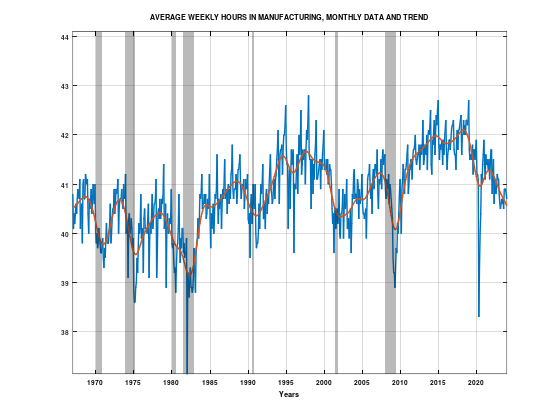

In [131]:
trendmanuf = trendmanuf(:, 1); % the first column of trend is the trend vector
figure(7)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendmanuf));  % Generate dates
dates = dates';

plot(dates, [manuf, trendmanuf], 'linewidth', 1.4)
grid on
title('AVERAGE WEEKLY HOURS IN MANUFACTURING, MONTHLY DATA AND TREND')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

ylim([min(trendmanuf) - 2, max(trendmanuf) + 2]);
y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [125]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendmanuf=diff(trendmanuf); % first difference of trend vector
time(5,:)
manuf(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 40.400


In [126]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrecmanuf = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendmanuf) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendmanuf(i:i+window-1) < 0) && dtrendmanuf(i-1) > 0 
        confirmedrecmanuf = [confirmedrecmanuf, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrecmanuf = confirmedrecmanuf'; % to column vector from row vector 
size(dtrendmanuf); % the vector we are using
size(time); % checking time vector size
recessiontimemanuf = time(confirmedrecmanuf,:); % DATES OF CONFIRMED RECESSION
recessionmanuf = dtrendmanuf(confirmedrecmanuf,:); % the values in trend that are recession points 

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [127]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexpmanuf = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendmanuf) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendmanuf(i:i+window-1) > 0) && dtrendmanuf(i-1) < 0 
        confirmedexpmanuf = [confirmedexpmanuf, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexpmanuf = confirmedexpmanuf'; % to column vector from row vector 
size(dtrendmanuf); % the vector we are using
size(time); % checking time vector size
expansiontimemanuf = time(confirmedexpmanuf,:); % DATES OF CONFIRMED EXPANSION
expansionmanuf = dtrendmanuf(confirmedexpmanuf,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendmanuf));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrecautos and confirmedexpautos indices to dates
recessionindmanuf = dates(confirmedrecmanuf);
expansionindmanuf = dates(confirmedexpmanuf);
size(dates)
size(dtrendmanuf) 

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:
ans =

   683     1

ans =

   683     1



PLOTTING TREND WITH RECESSION AND EXPANSION DATES


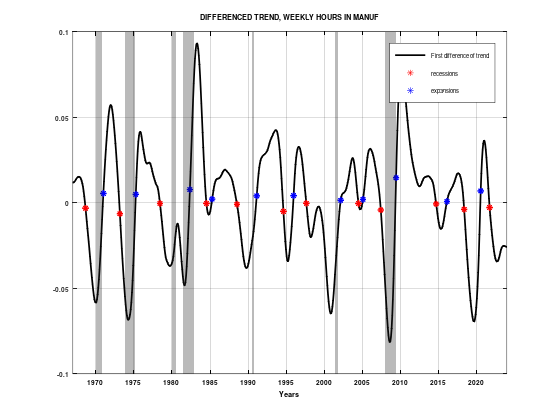

In [128]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(8)
plot(dates,dtrendmanuf,'k','linewidth',1.7)
hold on
plot(recessionindmanuf, recessionmanuf, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindmanuf, expansionmanuf, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, WEEKLY HOURS IN MANUF')
legend('First difference of trend','recessions','expansions')
hold off;

In [133]:
disp('INDICADOR COMPUESTO')
k=5; # retardo de 5 meses

b=[trendhouse,trendpermits,trendautos]';

size(b);

#b = b(:,1:300);
B=b*(eye(length(b))-ones(length(b))/length(b));
size(B);
[V,LAMBDA] = eig(B(:,1:length(b)-k)*B(:,k+1:length(b))'/(length(b)^(1)))

[m,ix]=max(diag(LAMBDA))
Weights=V(:,ix)./sum(V(:,ix)) 

INDICADOR COMPUESTO
V =

  -0.114772  -0.732987  -0.666999
  -0.069082   0.679210  -0.734663
  -0.990987   0.037480   0.124027

LAMBDA =

Diagonal Matrix

   2.2752e+04            0            0
            0   1.0623e+01            0
            0            0   1.5862e+03

m = 2.2752e+04
ix = 1
Weights =

   0.097691
   0.058801
   0.843508

